## Homework 02: Monte Carlo Basics
### PHYS420 — Intro to Computational Physics — Fall 2025  
### Hayden Dauphin

In [73]:
import matplotlib.pyplot as plt
import random 
import numpy as np
import scipy.stats as scistat
import statistics

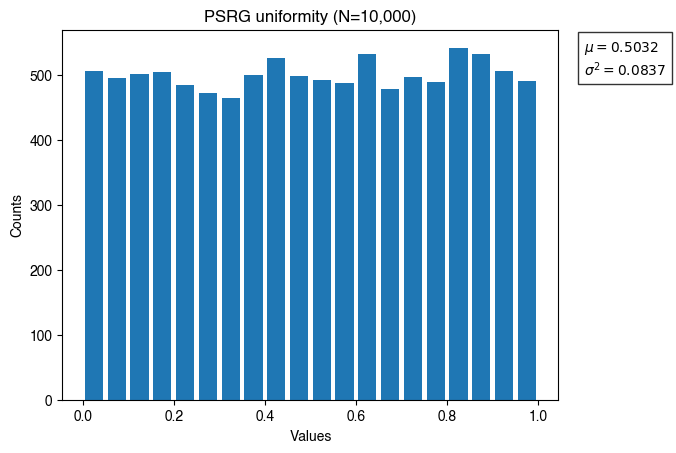

kth Moment Test:
k=2: Emperical moment = 0.3369, Theoretical moment = 0.3333
k=3: Emperical moment = 0.2532, Theoretical moment = 0.2500
k=4: Emperical moment = 0.2027, Theoretical moment = 0.2000

Statistical Dependence: 
C(1) = 0.252815
C(2) = 0.253768


In [134]:
''' 
Part A: Testing pseudo-random number generators 
'''
N = 10000 # number of values to generate
dataset = [random.random() for i in range(N)] # Uses Python's built in PRNG, random——module uses Mersenne Twister as core gen  
dataset = np.array(dataset)

# 1. Histogram and basic stats 
fig, ax = plt.subplots()
plt.rcParams['text.usetex'] = False

ax.hist(dataset, bins=20, rwidth=0.8) #Create a 20 bin histogram to sort the data in dataset
ax.set_title("PSRG uniformity (N=10,000)")
ax.set_xlabel("Values")
ax.set_ylabel("Counts")
#plt.show()

#compute mean and variance; print the values in a box beside the histogram 
mean = np.mean(dataset)
variance = statistics.variance(dataset)
ax.text(1.1, 500, 
        fr"$\mu={mean:.4f}$" 
        + "\n" 
        + fr"$\sigma^2={variance:.4f}$",
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"))

plt.show()


# 2. Kth moment test

ks = [2,3,4] #k values to test

#compute moments for all k values 
print("kth Moment Test:")
for k in ks: 
    moment = np.mean(dataset**k)
    moment_th = 1/(k+1)
    print (f"k={k}: Emperical moment = {moment:.4f}, Theoretical moment = {moment_th:.4f}")

# 3. Near-neighbor corelation test 

# Check statistical dependence between nearby values; function C(k)

def C(data, k): 
    N = len(data)
    return np.sum(data[:-k] * data[k:])/N 

lags = [1,2]
stat_dep = [C(dataset, k) for k in lags]
print("\nStatistical Dependence: ") 
for k, val in zip(lags, stat_dep):
    print(f"C({k}) = {val:.6f}")

